# Perform Clustering(DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:\\Users\\Pritee\\OneDrive\\Documents\\data science assignments\\assignments\\clustering\\crime_data.csv")

# Display the first few rows of the dataset
print(df.head())

# Extract features for clustering
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=2, min_samples=8)
labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")




   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
Silhouette Score: 0.23455598753159795


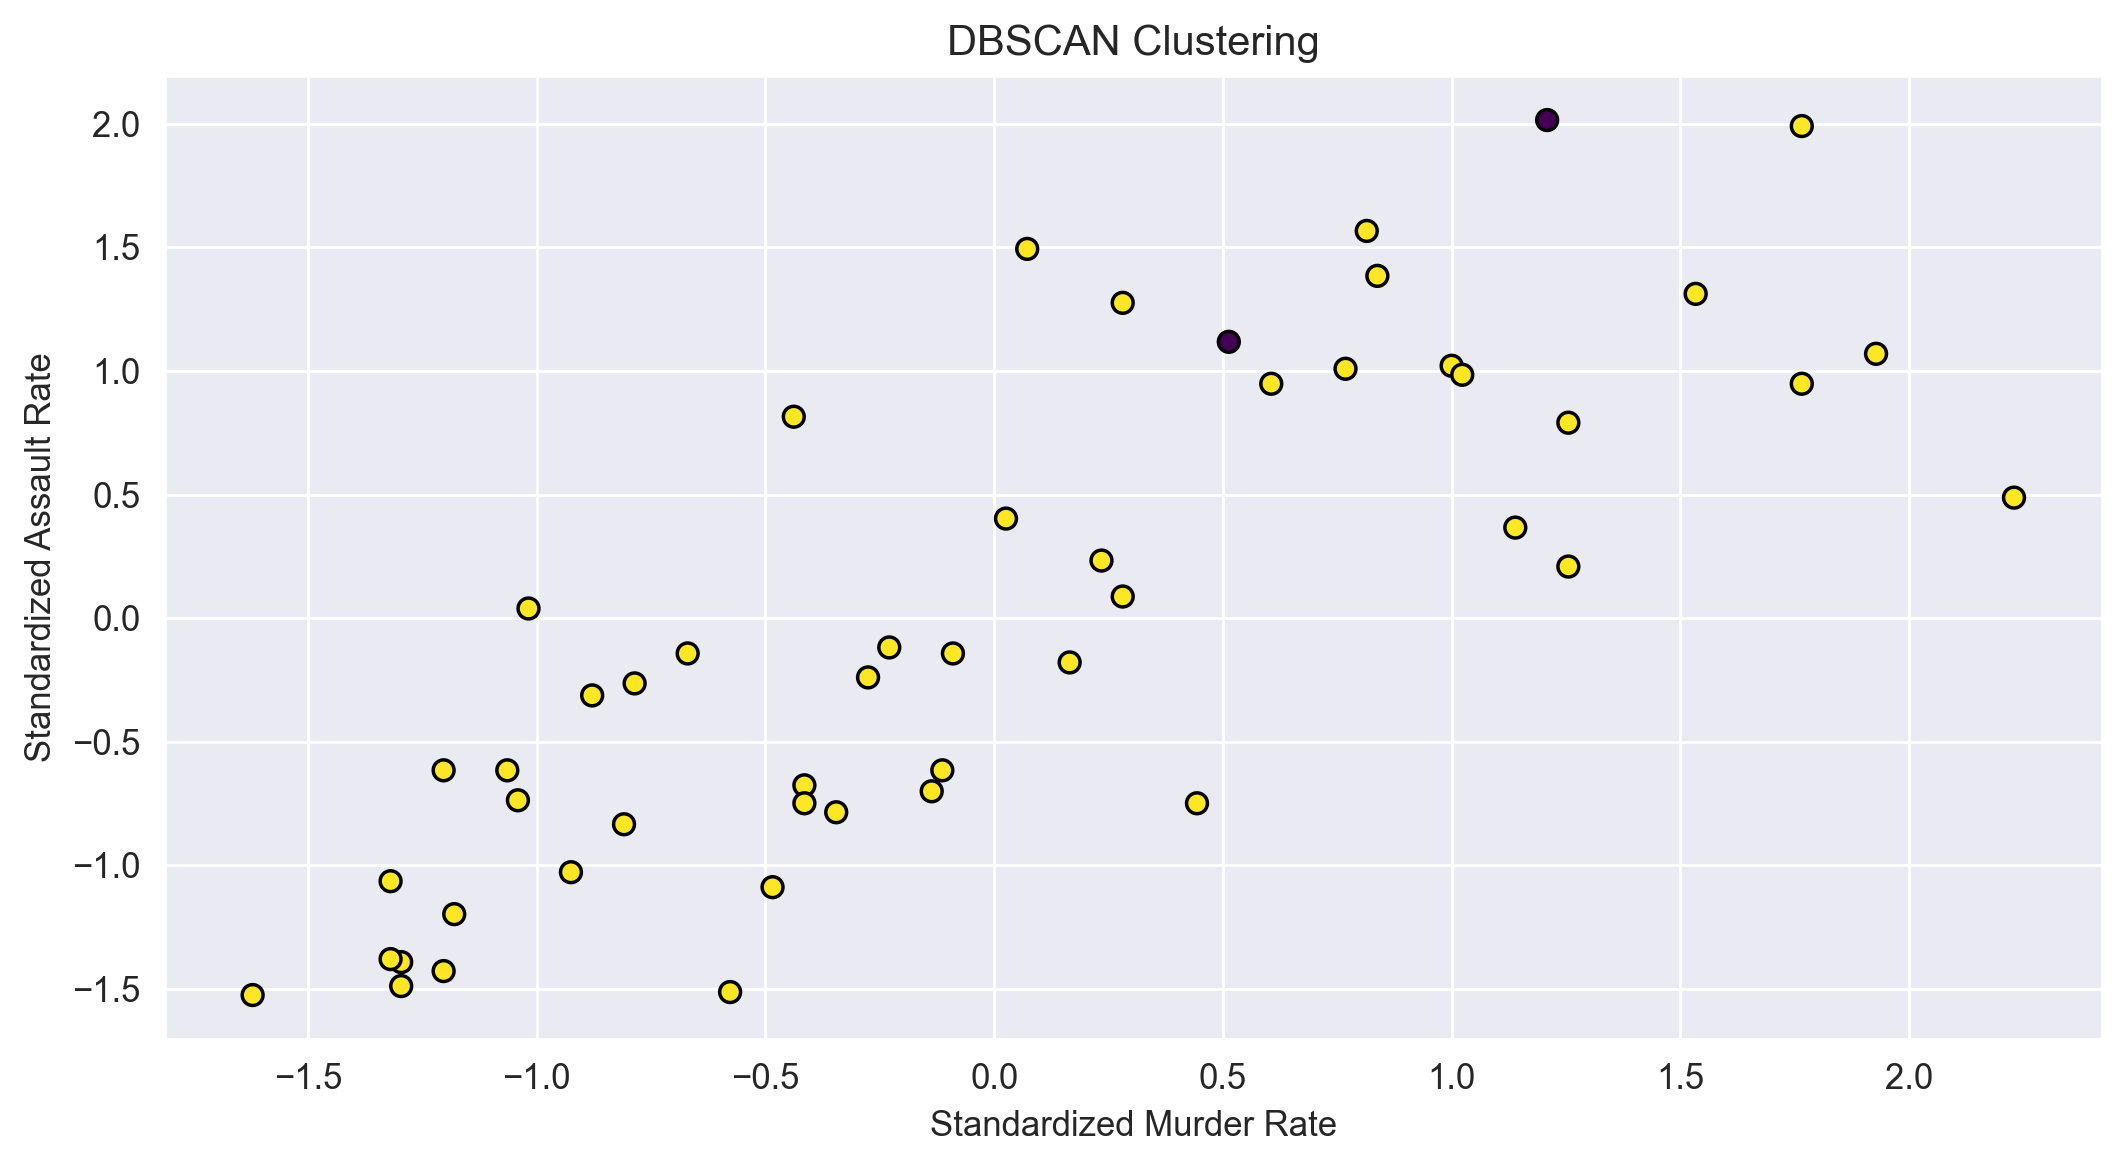

In [30]:
# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Standardized Murder Rate')
plt.ylabel('Standardized Assault Rate')
plt.show()

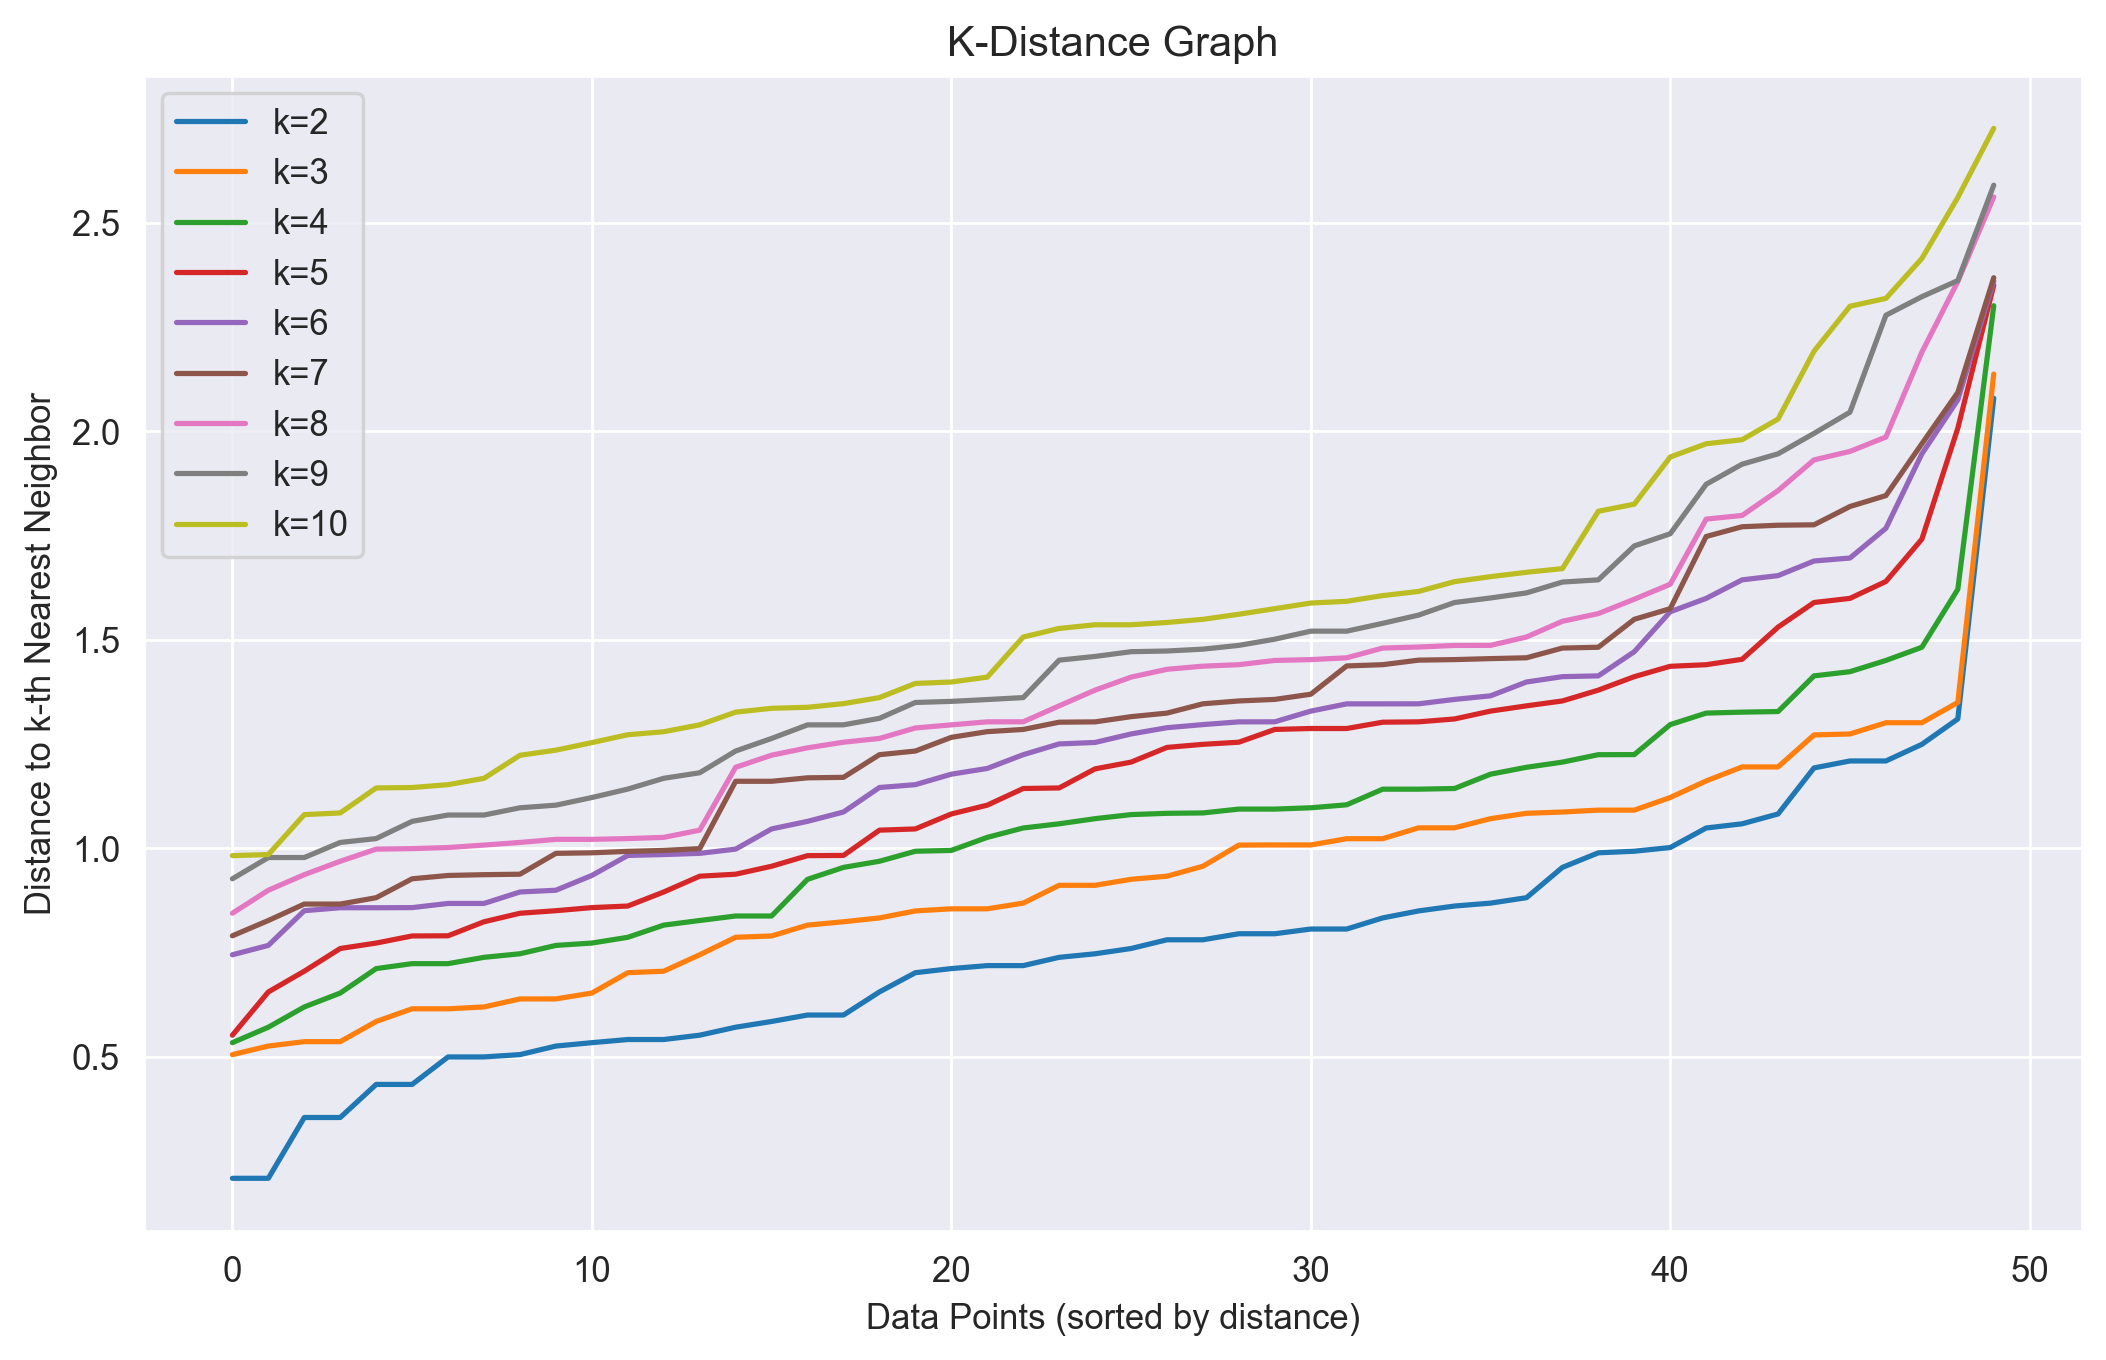

In [35]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Function to calculate the k-distance for each point
def calculate_k_distance(X, k):
    # Fit the nearest neighbors model
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    
    # Calculate distances and indices of k-nearest neighbors
    distances, _ = neigh.kneighbors(X)
    
    # Return the k-distances (distance to the k-th nearest neighbor for each point)
    return np.sort(distances[:, -1])

# Calculate k-distances for different values of k
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
k_distances = []

for k in k_values:
    k_distances.append(calculate_k_distance(X_scaled, k))

# Plot the K-distance graph
plt.figure(figsize=(10, 6))
for i in range(len(k_values)):
    plt.plot(np.arange(len(X_scaled)), k_distances[i], label=f'k={k_values[i]}')

plt.title('K-Distance Graph')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('Distance to k-th Nearest Neighbor')
plt.legend()
plt.show()
